Компания планирует запустить новую акцию, чтобы продать как можно больше туров. Команда разработала два варианта посадочной страницы.

Стоимость туров:

- Таиланд — 100000 рублей;
- Турция — 60000 рублей;
- Мальдивы — 200000 рублей;
- Санкт-Петербург — 10000 рублей;
- Камчатка — 150000 рублей.
- Проверьте, какая из страниц приносит больше покупок.

### Задачи: проанализировать результаты А/B теста.

#### Рассчитать кумулятивные метрики:
- постройте график конверсии в группах по дням;
- постройте график среднего чека в группах по дням;
- постройте график кумулятивных метрик по конверсии и по среднему чеку;
- сделайте выводы.

#### Провести статистическую проверку гипотез:
- равенстве конверсии;
- равенстве выручки;
- равенстве средних чеков по дням.


In [1]:
# импортируем нужные библиотеки
import pandas as pd
import scipy.stats as st 
import seaborn as sns
import matplotlib.pyplot as plt
import math as mth

# получаем файл
df = pd.read_csv('ab_data.csv', index_col = False)
df = df.drop(columns = 'Unnamed: 0')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user_id   294478 non-null  int64 
 1   date      294478 non-null  object
 2   group     294478 non-null  object
 3   purchase  294478 non-null  int64 
 4   price     294478 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 11.2+ MB


#### знакомство с данными

In [2]:
df # общий датафрейм

,user_id,date,group,purchase,price
0,851104,2021-01-21,A,0,0
1,804228,2021-01-12,A,0,0
2,661590,2021-01-11,B,0,0
3,853541,2021-01-08,B,0,0
4,864975,2021-01-21,A,1,150000
...,...,...,...,...,...
294473,751197,2021-01-03,A,0,0
294474,945152,2021-01-12,A,0,0
294475,734608,2021-01-22,A,0,0
294476,697314,2021-01-15,A,0,0


#### посмотрю за какой период данные

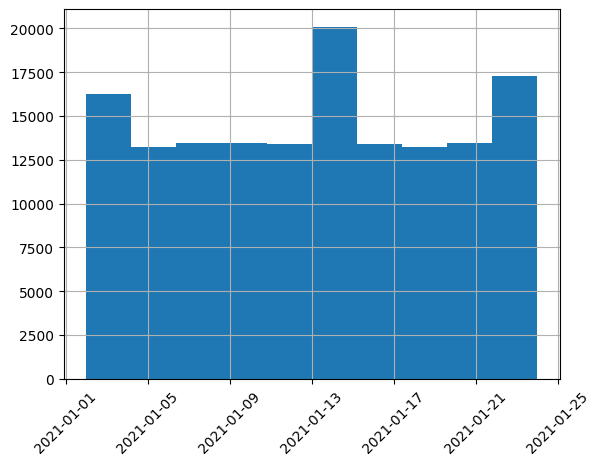

In [3]:
# делим на два датафрейма по группам
df.date = pd.to_datetime(df.date)
dfa = df[df['group']=='A']
dfb = df[df['group']=='B']

dfa['date'].hist() # смотрим период
plt.xticks(rotation = 45); # Разворот названия дат на оси X на 45 градусов

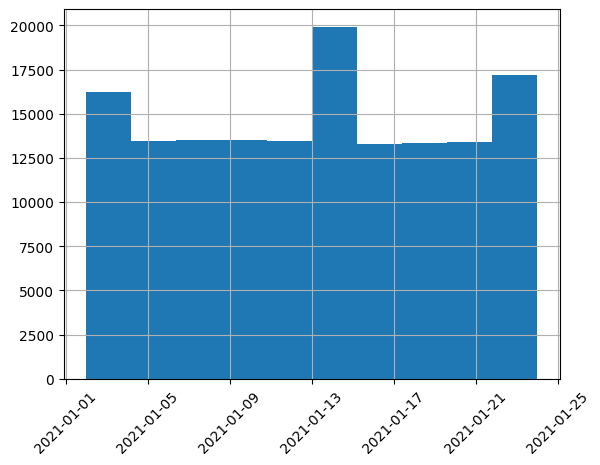

In [4]:
dfb['date'].hist()
plt.xticks(rotation = 45); # Разворот названия дат на оси X на 45 градусов
# заодно преобразовал тип данных в столбце  date

In [5]:
display(dfa.describe(datetime_is_numeric=True))




,user_id,date,purchase,price
count,147202.000000,147202,147202.000000,147202.000000
mean,788123.098035,2021-01-13 01:55:49.470795520,0.120399,9757.068518
min,630002.000000,2021-01-02 00:00:00,0.000000,0.000000
25%,709287.000000,2021-01-08 00:00:00,0.000000,0.000000
50%,788053.500000,2021-01-13 00:00:00,0.000000,0.000000
75%,867155.500000,2021-01-19 00:00:00,0.000000,0.000000
max,945998.000000,2021-01-24 00:00:00,1.000000,200000.000000
std,91278.896888,NaN,0.325429,34315.188601


In [6]:
display(dfb.describe(datetime_is_numeric=True))

,user_id,date,purchase,price
count,147276.000000,147276,147276.000000,147276.000000
mean,787825.226283,2021-01-13 01:23:47.034955008,0.118920,10552.296369
min,630000.000000,2021-01-02 00:00:00,0.000000,0.000000
25%,708729.500000,2021-01-08 00:00:00,0.000000,0.000000
50%,787837.500000,2021-01-13 00:00:00,0.000000,0.000000
75%,866693.750000,2021-01-19 00:00:00,0.000000,0.000000
max,945999.000000,2021-01-24 00:00:00,1.000000,200000.000000
std,91142.800641,NaN,0.323695,35968.230971


### Данные представлены со 2 января по 24 число включительно

In [7]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147202 entries, 0 to 294476
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   user_id   147202 non-null  int64         
 1   date      147202 non-null  datetime64[ns]
 2   group     147202 non-null  object        
 3   purchase  147202 non-null  int64         
 4   price     147202 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.7+ MB


In [8]:
# смотрим количество посещений в группах и процент отклонения 
print(dfa.user_id.count(),dfb.user_id.count())
print((dfa.user_id.count()-dfb.user_id.count())/dfb.user_id.count())


147202 147276
-0.000502457970069801


147276 (В), 147202 (А) - Разница 0.05%. Распределение сработало корректно. Продолжаем тест, так как разница не превышает 1%.

#### Проверю, есть ли пользователи, которые в процессе A/B-теста попали в обе тестовые группы? Если да, то сколько таких уникальных пользователей?

In [9]:
a=set(dfa.user_id)
b=set(dfb.user_id)
print(len(a),len(b))
print(len(a.difference(b)), len(b.difference(a)))
print(len(a) - len(a.difference(b)), 'столько пользователей попали в обе группы')

146195 146284
144300 144389
1895 столько пользователей попали в обе группы


####  Надо исключить пользователей, оказавшихся в обеих группах

In [10]:

bb = b.copy()
aa = a.copy()
a = a.difference(bb) # группа А
b = bb.difference(aa) # группа B
len(bb)


146284

In [11]:
dfa = dfa[dfa.user_id.isin(a)] # фильтрую и перезаписываю данные
dfb = dfb[dfb.user_id.isin(b)]
display(dfa.info())
display(dfb.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 145307 entries, 0 to 294476
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   user_id   145307 non-null  int64         
 1   date      145307 non-null  datetime64[ns]
 2   group     145307 non-null  object        
 3   purchase  145307 non-null  int64         
 4   price     145307 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145381 entries, 2 to 294477
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   user_id   145381 non-null  int64         
 1   date      145381 non-null  datetime64[ns]
 2   group     145381 non-null  object        
 3   purchase  145381 non-null  int64         
 4   price     145381 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.7+ MB


None

In [12]:
print(dfa.user_id.nunique(), dfb.user_id.nunique())
print(dfa.user_id.nunique()/dfb.user_id.nunique()-1)

144300 144389
-0.0006163904452555213


### 145381 (B), 145307 (A) - теперь столько пользователей, разница меньше 1%

### Разница в количестве сессий по прежнему отличается менее, чем на 1%?

In [13]:
print(((dfa.user_id.count()-dfb.user_id.count())/dfb.user_id.count()*100)<1)

True


#### Собераю показатели конверсии и среднего чека по каждой группе

In [14]:
df = pd.concat([dfb, dfa]).reset_index(drop=True) # у нас был исходный датафрейс с неверно распределённой аудиторией, теперь я его поправил
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290688 entries, 0 to 290687
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   user_id   290688 non-null  int64         
 1   date      290688 non-null  datetime64[ns]
 2   group     290688 non-null  object        
 3   purchase  290688 non-null  int64         
 4   price     290688 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 11.1+ MB


In [15]:
df.head() 

,user_id,date,group,purchase,price
0,661590,2021-01-11,B,0,0
1,853541,2021-01-08,B,0,0
2,679687,2021-01-19,B,1,10000
3,817355,2021-01-04,B,1,60000
4,839785,2021-01-15,B,1,10000


In [16]:
df1 = df.groupby(['date', 'group'], as_index=False).agg({'user_id' : 'count', 'purchase': 'sum', 'price': 'sum'})
#df.purchase = df.purchase.astype('float64')
#df.user_id = df.user_id.astype('float64')
df1['conversion'] = df1.purchase/df1.user_id # конверсия в покупку
df1 = df1.groupby('group')[['price', 'user_id', 'purchase']].agg('sum').reset_index() # общий итог
df1

,group,price,user_id,purchase
0,A,1417780000,145307,17487
1,B,1533010000,145381,17290


In [17]:
df1['avg_price'] = df1['price'] / df1['purchase'] # средний чек
df1['conversion'] = df1['purchase'] / df1['user_id'] # конверсия в покупку
df1.head() 

,group,price,user_id,purchase,avg_price,conversion
0,A,1417780000,145307,17487,81076.228055,0.120345
1,B,1533010000,145381,17290,88664.545980,0.118929


### Первичные выводы:
#### Конверсия группы А — 12.03; средний чек группы B — 88 664.55  
#### Несмотря на то что в группе B было больше посетителей, (относительная) конверсия в группе B меньше на 1.16%. За счёт меньшей конверсии в группе B было меньше покупок, однако выручка группы B больше выручки группы A на 115230000 единиц, или 7.5%. Большая выручка в группе B складывается за счёт того, что средний чек группы B выше среднего чека группы A

#### Посмотрим на  гистограмму по выручке для группы A и для группы B

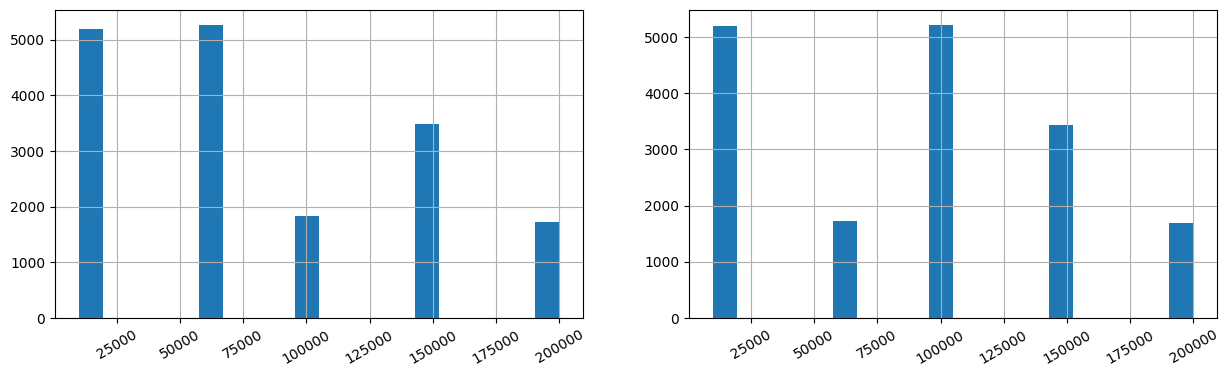

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,4))
axes[0].hist(df[(df['group'] == 'A')&(df['price']>0)].price, bins = 20, label='Group A')
axes[1].hist(df[(df['group'] == 'B')&(df['price']>0)].price, bins = 20, label='Group B')
axes[0].grid(True) 
axes[1].grid(True) 

axes[0].xaxis.set_tick_params(rotation=30);
axes[1].xaxis.set_tick_params(rotation=30);



#### Участники группы A чаще покупают туры за 60000 рублей, при этом реже покупают туры за 100000 рублей. В остальном покупательская способность обеих групп похожа.

In [19]:
df1.head()


,group,price,user_id,purchase,avg_price,conversion
0,A,1417780000,145307,17487,81076.228055,0.120345
1,B,1533010000,145381,17290,88664.545980,0.118929


### Создам кумулятивную таблицу

In [20]:
def cummulative_table(data): # В переменную data будем передавать название переменной датафейма
    df_cumm = [] # Создаём пустой список
    for i in data['date'].values: # Запускаем цикл по каждому отдельному значению даты
        out = data[data['date'] <= i].groupby('group')\
               .agg({'date':'max', 'user_id':'sum', 'purchase':'sum', 'price': 'sum'})
        df_cumm.append(out) # Полученный срез добавляем в созданный ранее список
    return pd.concat(df_cumm).reset_index() # Объединяем списки и возвращаем результат

In [21]:
total_df = df.groupby(['date', 'group'], as_index=False).agg({'user_id' : 'count', 'purchase': 'sum', 'price': 'sum'})
cumm_df = cummulative_table(total_df).drop_duplicates()
cumm_df.head()


,group,date,user_id,purchase,price
0,A,2021-01-02,2854,359,29410000
1,B,2021-01-02,2861,345,29660000
4,A,2021-01-03,9450,1107,91410000
5,B,2021-01-03,9480,1099,95620000
8,A,2021-01-04,16016,1906,155660000


In [22]:
cumm_df['total_conv'] =  cumm_df['purchase'] / cumm_df['user_id']
cumm_df['avg_price'] =  cumm_df['price'] / cumm_df['purchase']
cumm_a = cumm_df[cumm_df['group'] == 'A'] # таблицы кум. метрик по группам
cumm_b = cumm_df[cumm_df['group'] == 'B']
cumm_b.head()

,group,date,user_id,purchase,price,total_conv,avg_price
1,B,2021-01-02,2861,345,29660000,0.120587,85971.014493
5,B,2021-01-03,9480,1099,95620000,0.115928,87006.369427
9,B,2021-01-04,16016,1863,163650000,0.116321,87842.190016
13,B,2021-01-05,22527,2612,227200000,0.115950,86983.154671
17,B,2021-01-06,29278,3450,302220000,0.117836,87600.000000


#### Строю графики

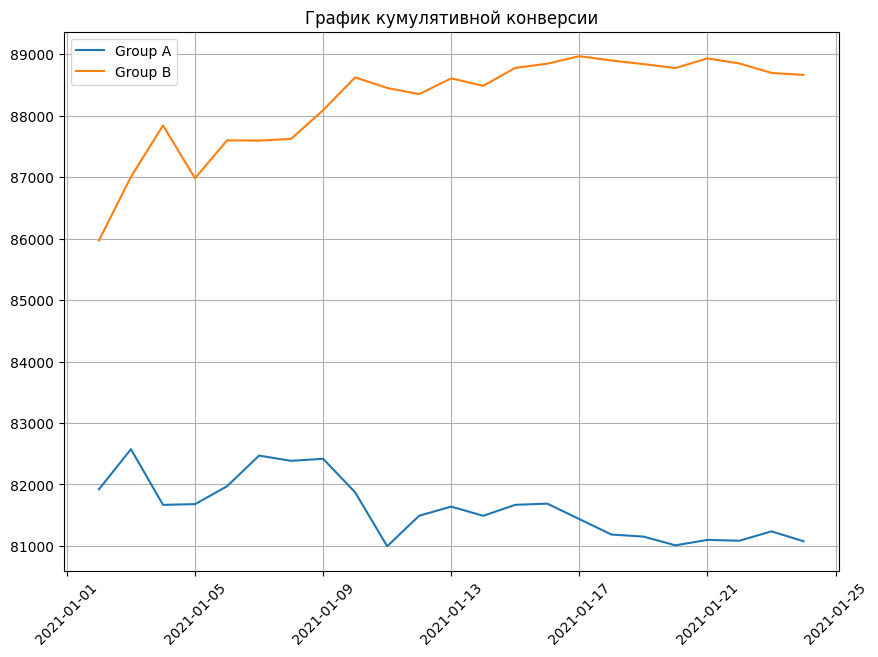

In [23]:
# График кумулятивного среднего чека по дням
plt.figure(figsize=(10,7))
plt.plot(cumm_a['date'], cumm_a['avg_price'], label='Group A')
plt.plot(cumm_b['date'], cumm_b['avg_price'], label='Group B')
plt.title('График кумулятивной конверсии')
plt.xticks(rotation = 45)
plt.legend()
plt.grid(True)
plt.show()

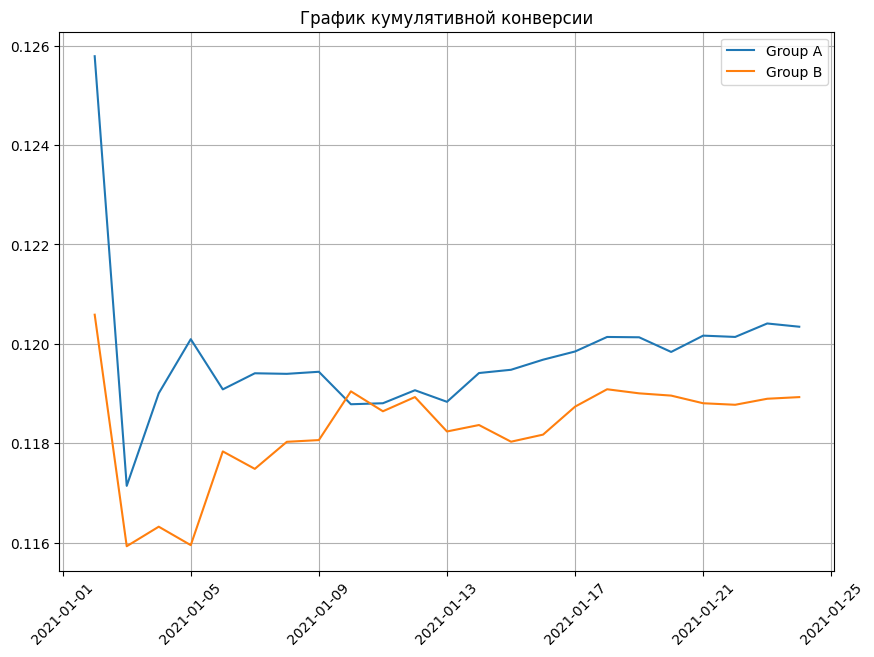

In [24]:
# График кумулятивной конверсии
plt.figure(figsize=(10,7))
plt.plot(cumm_a['date'], cumm_a['total_conv'], label='Group A')
plt.plot(cumm_b['date'], cumm_b['total_conv'], label='Group B')
plt.title('График кумулятивной конверсии')
plt.xticks(rotation = 45)
plt.legend()
plt.grid(True)
plt.show()

### Изначально конверсия группы B была ниже конверсии группы А, однако она показывала стабильный рост, и примерно 10 января конверсия группы B стала выше конверсии группы А. После чего конверсия группы B зафиксировалась примерно на этом уровне (с колебаниями). В то время как конверсия группы А начала постепенно расти. В результате конверсия группы А стабильно выше группы B. Но средний чек группы B выше среднего чека группы А.


### Приступаю к заданию: статистическая проверка гипотезы о равенстве конверсии
### Проверяю распределение показателей конверсии в группах

In [25]:
# датафрейм конверсии и среднего чека по дням - не кумулятивный
total_df['total_conv'] =  total_df['purchase'] / total_df['user_id']
total_df['avg_price'] =  total_df['price'] / total_df['purchase']
total_df.head()

,date,group,user_id,purchase,price,total_conv,avg_price
0,2021-01-02,A,2854,359,29410000,0.125788,81922.005571
1,2021-01-02,B,2861,345,29660000,0.120587,85971.014493
2,2021-01-03,A,6596,748,62000000,0.113402,82887.700535
3,2021-01-03,B,6619,754,65960000,0.113914,87480.106101
4,2021-01-04,A,6566,799,64250000,0.121687,80413.016270


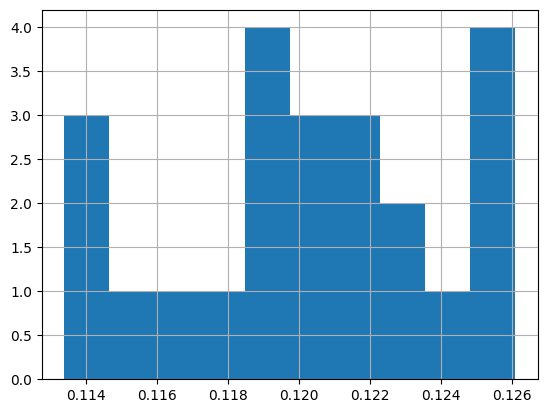

In [26]:
total_df['total_conv'][total_df['group'] == 'A'].hist();

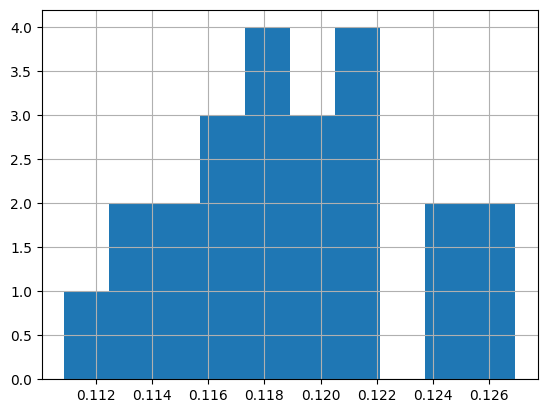

In [27]:
total_df['total_conv'][total_df['group'] == 'B'].hist();

#### распределение похоже на нормальное, провожу  Z тест для долей

### Z тест 

In [28]:
x1=total_df[total_df['group'] == 'A']['purchase'].sum()
x2=total_df[total_df['group'] == 'B']['purchase'].sum()
n2=total_df[total_df['group'] == 'B']['user_id'].sum()
n1=total_df[total_df['group'] == 'A']['user_id'].sum()
 # нужно как отношение суммы количества покупок к сумме пользователей 
# (и по группам, и по всей выборке) (отредактировано) 

# считаем пропорции
p1 = x1/n1
p2 = x2/n2
p = (x1 + x2) / (n1 + n2)
diff = p1 - p2
#Рассчитаем Z-статистику:

z = diff / mth.sqrt(p * (1 - p) * (1/n1 + 1/n2))
#Теперь из полученной Z-статистики рассчитаем p-value при нормальном стандартном распределении.

#Зададим нормальное стандартное распределение со средним, равным нулю, и стандартным отклонением, равным единице:

distr = st.norm(0, 1)
#Рассчитаем p-value:

p_val = (1 - distr.cdf(abs(z)))*2 
p_val



0.23940749849829834

### P-value больше принятого уровня значимости (5%), следовательно, статистически значимая разница между конверсиями отсутствует. 

#### Проверяю гипотезу о равентсве выручки

In [29]:
total_df.head()

,date,group,user_id,purchase,price,total_conv,avg_price
0,2021-01-02,A,2854,359,29410000,0.125788,81922.005571
1,2021-01-02,B,2861,345,29660000,0.120587,85971.014493
2,2021-01-03,A,6596,748,62000000,0.113402,82887.700535
3,2021-01-03,B,6619,754,65960000,0.113914,87480.106101
4,2021-01-04,A,6566,799,64250000,0.121687,80413.016270


<AxesSubplot: >

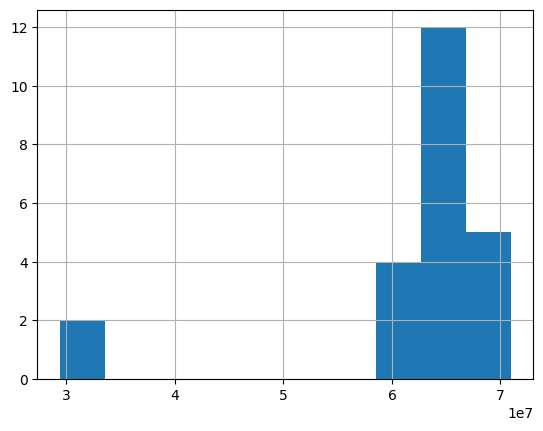

In [30]:
total_df[total_df['group'] == 'A'].price.hist()

<AxesSubplot: >

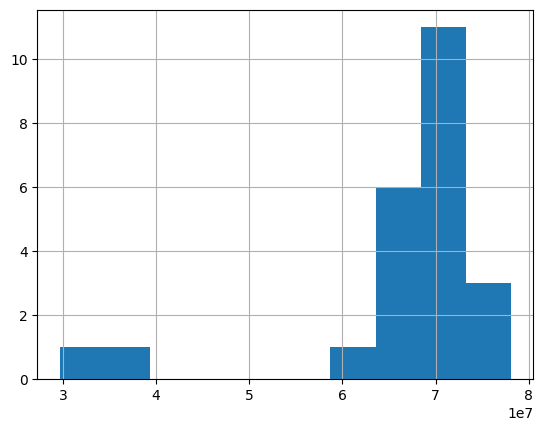

In [31]:
total_df[total_df['group'] == 'B'].price.hist()

In [32]:
st.shapiro(total_df[total_df['group'] == 'A'].price) # проверяем на нормальность критерием Шапиро-Уилка

ShapiroResult(statistic=0.6358132362365723, pvalue=2.2869323856866686e-06)

In [33]:
st.shapiro(total_df[total_df['group'] == 'B'].price)

ShapiroResult(statistic=0.6256370544433594, pvalue=1.7464255961385788e-06)

####  Распределение не нормальное, использую Тест Манна-Уитни 

In [34]:
x = st.mannwhitneyu(total_df[total_df['group'] == 'A'].price, total_df[total_df['group'] == 'B'].price, alternative='two-sided')
x


MannwhitneyuResult(statistic=99.0, pvalue=0.00028893174193897724)

### pvalue < 0,05 - следовательно выручка не равна(стоимость заказов)

####

#### Проверяю различия средних чеков по дням

<AxesSubplot: >

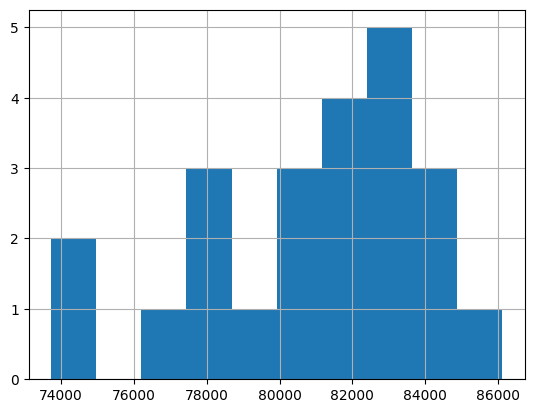

In [35]:
total_df[total_df['group'] == 'A'].avg_price.hist()

<AxesSubplot: >

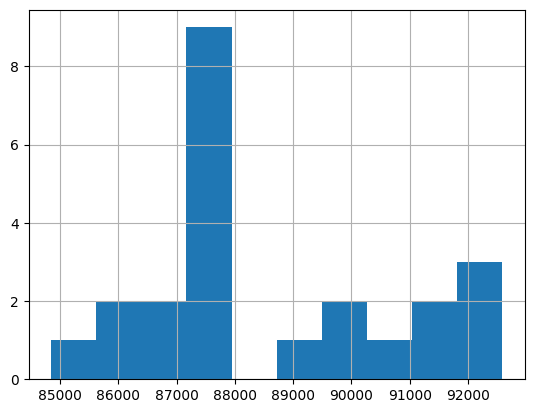

In [36]:
total_df[total_df['group'] == 'B'].avg_price.hist()

#### проверим на нормальность

In [37]:
st.shapiro(total_df[total_df['group'] == 'A'].avg_price)

ShapiroResult(statistic=0.9469833970069885, pvalue=0.25307759642601013)

In [38]:
st.shapiro(total_df[total_df['group'] == 'B'].avg_price)

ShapiroResult(statistic=0.9269078373908997, pvalue=0.09378302097320557)

#### pvalue больше 5% - распределения нормальные, значит проводим Т тест

In [39]:
results = st.ttest_ind(total_df[total_df['group'] == 'A'].avg_price, total_df[total_df['group'] == 'B'].avg_price, equal_var = True)
results

Ttest_indResult(statistic=-9.609061044565284, pvalue=2.2523589349617907e-12)

#### Несмотря на то что конверсия группы B ниже, статистической значимости в конверсии не достигнуто, соответственно, считать конверсии разными оснований нет. Зато средний чек группы B значительно выше среднего чека группы A. Статистическая значимость достигнута. Вариант сайта B приносит значимо больше выручки, чем вариант сайта A. Рекомендуем признать, что вариант B лучше, чем вариант A! 